In [132]:
from numpy import * 
from os import listdir 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np1 
import numpy.linalg as np 
from scipy.stats.stats import pearsonr
plt.style.use("seaborn")

In [133]:
def estimate_coef(x, y):
    # number of observations/points
    n = np1.size(x)
 
    # mean of x and y vector
    m_x = np1.mean(x)
    m_y = np1.mean(y)
 
    # calculating cross-deviation and deviation about x
    SS_xy = np1.sum(y*x) - n*m_y*m_x
    SS_xx = np1.sum(x*x) - n*m_x*m_x
 
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
 
    return (b_0, b_1)

In [134]:
x = np1.array([43, 21, 25, 42, 57, 59])
y = np1.array([95, 65, 79, 75, 87, 81])
 
    # estimating coefficients
b = estimate_coef(x, y)
print("Estimated coefficients:\nb_0 = {}  \
          \nb_1 = {}".format(b[0], b[1]))
 
print("y = ", (b[0] + 55*b[1]))

Estimated coefficients:
b_0 = 64.7182001343183            
b_1 = 0.37931497649429224
y =  85.58052384150437


In [135]:
def kernel(point,xmat, k):
    m,n = np1.shape(xmat) 
    weights = np1.mat(np1.eye((m))) 
    for j in range(m): 
        diff = point - X[j] 
        weights[j,j] = np1.exp(diff*diff.T/(-2.0*k**2))
        #print(type(weights[j,j]))
    return weights

In [136]:
def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k) 
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [137]:
def localWeightRegression(xmat,ymat,k):
    m,n = np1.shape(xmat) 
    ypred = np1.zeros(m) 
    for i in range(m): 
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred

In [138]:
#load data points 
data = pd.read_csv('test.csv') 
bill = np1.array(data.X) 
tip = np1.array(data.Y)

In [139]:
#preparing and add 1 in bill 
mbill = np1.mat(bill) 
mtip = np1.mat(tip) 
# mat is used to convert to n dimesiona to 2 dimensional array form 
m= np1.shape(mbill)[1] # print(m) 244 data is stored in m 
one = np1.mat(np1.ones(m)) 
X= np1.hstack((one.T,mbill.T)) # create a stack of bill from ONE 
print(X) 
#set k here 
ypred = localWeightRegression(X,mtip,2) 
SortIndex = X[:,1].argsort(0)

[[ 1. 43.]
 [ 1. 21.]
 [ 1. 25.]
 [ 1. 42.]
 [ 1. 57.]
 [ 1. 59.]
 [ 1. 55.]]


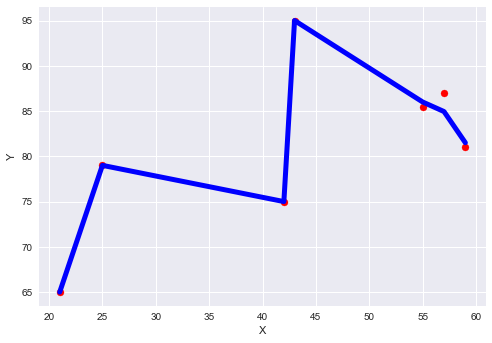

In [140]:
xsort = X[SortIndex][:,0] 
fig = plt.figure() 
ax = fig.add_subplot(1,1,1) 
ax.scatter(bill,tip, color='red') 
ax.plot(xsort[:,1],ypred[SortIndex], color = 'blue', linewidth=5) 
plt.xlabel('X') 
plt.ylabel('Y') 
plt.show();